# 02 Using Inputs

This notebook demonstrates how to change a parameter value across the battery pack by using inputs

In [2]:
!pip install -q git+https://github.com/pybamm-team/liionpack.git@main
import liionpack as lp
import pybamm
import numpy as np

In [14]:
I_mag = 5.0
OCV_init = 4.0 # used for intial guess
Ri_init = 5e-2 # used for intial guess
R_busbar = 1.5e-6 # very small to simulate evenly distributed currents
R_connection = 1e-2
Np = 4
Ns = 1
Nbatt = Np * Ns
netlist = lp.setup_circuit(Np=Np, Ns=Ns, Rb=R_busbar, Rc=R_connection, Ri=Ri_init, V=OCV_init, I=I_mag)

In [15]:
experiment = pybamm.Experiment(
    [
     "Discharge at 5 A for 30 minutes",
     "Rest for 15 minutes"
    ],
    period="10 seconds",
)

c:\users\tom\code\pybamm\pybamm\experiments\experiment.py:82: DeprecationWarning: 'parameters' as an input to the Experiment class will soon be deprecated. Please open an issue if you are using this feature.
  warnings.warn(


In [16]:
chemistry = pybamm.parameter_sets.Chen2020
parameter_values = pybamm.ParameterValues(chemistry=chemistry)

Everything up to now has been standard but if we want to change a parameter we need to update the parameter_values dictionary. Let's use particle radius as an example:

In [17]:
parameter_values.search("radius")

Negative particle radius [m]	5.86e-06
Positive particle radius [m]	5.22e-06


Change the parameter in the same way as you would with PyBaMM

In [18]:
parameter_values.update({"Negative particle radius [m]": "[input]"})

In [19]:
parameter_values["Negative particle radius [m]"]

InputParameter(0x318c638d4d7b90f1, Negative particle radius [m], children=[], domain=[], auxiliary_domains={})

With very small busbar resistance all the cells should experience very similar currents and with the same input the solutions should all look very similar too.

Define the input as a dictionary to pass to the solver with a value that is an array with the an element for each battery

In [23]:
inputs = {"Negative particle radius [m]" : np.ones(4) * 6e-6}

Stepping simulation: 100%|██████████████████████████████████████████████████████████| 270/270 [00:02<00:00, 115.34it/s]


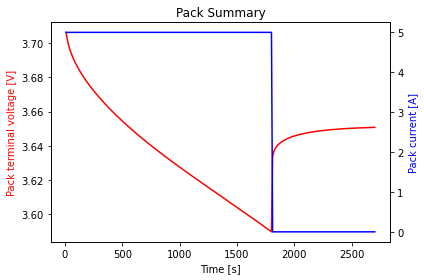

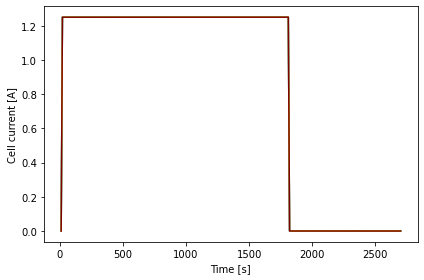

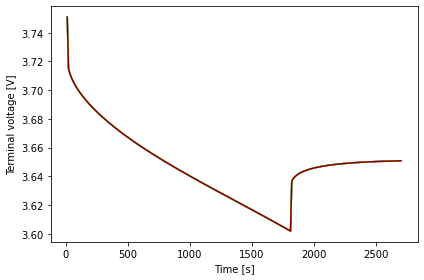

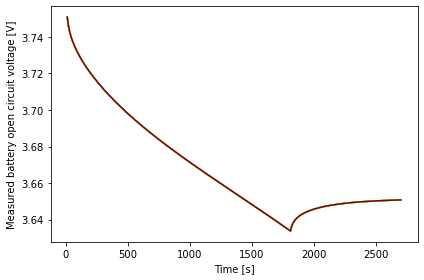

In [26]:
output = lp.solve(netlist=netlist,
                  parameter_values=parameter_values,
                  experiment=experiment,
                  inputs=inputs)
lp.plot_output(output)

Now if we change the input let's see what happens

In [27]:
inputs = {"Negative particle radius [m]" : np.linspace(0.5, 1.5, 4) * 6e-6}

Stepping simulation: 100%|██████████████████████████████████████████████████████████| 270/270 [00:02<00:00, 114.96it/s]


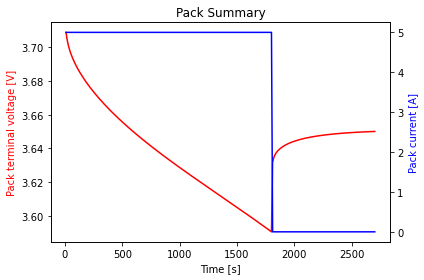

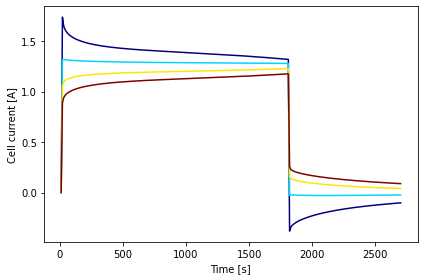

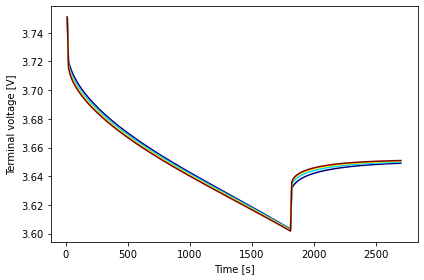

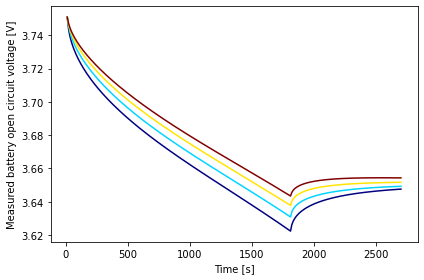

In [28]:
output = lp.solve(netlist=netlist,
                  parameter_values=parameter_values,
                  experiment=experiment,
                  inputs=inputs)
lp.plot_output(output)